In [12]:
import numpy as np
from scipy.spatial import distance_matrix
from scripts.grafo import Grafo
import graphviz

In [13]:
# import e pré processamento do dataset iris
csv = []
with open("arquivos/IrisDataset.csv","r") as f:
    for line in f:
        csv.append(line)

# remoção da primeira linha com titulo
csv = csv[1:]

dataset = []
for line in csv:    
    dataset.append(line.split(",")[0:4])

# converte de para 
dataset = np.asarray(dataset).astype(np.float64)
print(dataset)
print(dataset.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.  1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [14]:
# calculo das distancias
dist = distance_matrix(dataset,dataset)
print(dist)

# normalização das distancias
dist_norm = (dist.max() - dist) / (dist.max() - dist.min())
print(dist_norm)
print(dist_norm.shape)

[[0.         0.53851648 0.50990195 ... 4.45982062 4.65080638 4.14004831]
 [0.53851648 0.         0.3        ... 4.49888875 4.71805044 4.15331193]
 [0.50990195 0.3        0.         ... 4.66154481 4.84871117 4.29883705]
 ...
 [4.45982062 4.49888875 4.66154481 ... 0.         0.6164414  0.64031242]
 [4.65080638 4.71805044 4.84871117 ... 0.6164414  0.         0.76811457]
 [4.14004831 4.15331193 4.29883705 ... 0.64031242 0.76811457 0.        ]]
[[1.         0.92399413 0.92803277 ... 0.37054377 0.34358817 0.41567623]
 [0.92399413 1.         0.95765819 ... 0.36502972 0.33409738 0.41380422]
 [0.92803277 0.95765819 1.         ... 0.34207255 0.31565601 0.39326489]
 ...
 [0.37054377 0.36502972 0.34207255 ... 1.         0.91299586 0.90962671]
 [0.34358817 0.33409738 0.31565601 ... 0.91299586 1.         0.8915888 ]
 [0.41567623 0.41380422 0.39326489 ... 0.90962671 0.8915888  1.        ]]
(150, 150)


In [15]:
# construnção do grafo utilizando o limiar l
g = Grafo(direcionado=False)
l = 0.05
# se a distancia normalizada for menor que o limiar
# cria uma aresta entre i e j
for i in range(len(dist_norm)):
    for j in range(i+1,len(dist_norm)):
        if dist_norm[i,j] <= l:
            g.adciona_vertice(i)
            g.adciona_vertice(j)
            g.adciona_aresta(i,j)

g.mostra_grafo()

8:[118]
13:[117, 118, 122]
22:[117, 118, 122]
38:[118]
41:[118]
42:[118]
117:[]
118:[]
122:[]


8 1
118 0
13 3
117 0
122 0
22 3
38 1
41 1
42 1


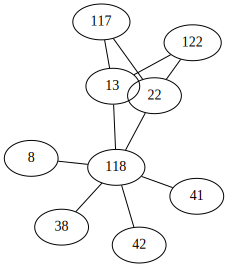

In [16]:
# plotagem do grafo
dot = graphviz.Graph(comment="Grafo",engine="neato")
dot.graph_attr["Goverlap"] = "scale"
dot.graph_attr["cluster"] = "true"
dot.format = "png"
dot.attr

# adciona os vertices
for key in g.grafo:
    print(key, g.grau_vertice(key))
    dot.node(str(key))

# adciona as arestas
for key in g.grafo:
    for node in g.grafo[key]:
        dot.edge(str(key),str(node))

dot.render()
dot